# Project 1: Sentiment Analysis on Movie Reviews

This project is an individual project. In this project, you are expected to solve the classification problem on movie reviews. Movie reviews have two different sentiments (positive or negative), please train machine learning or deep learning models to classify movie reviews into correct categories (1 for positive 1 and 0 for negative).

**NOTE:**
* Please solve the problems in this notebook using the dataset `IBDM Dataset.csv`.
* Important Dates: 
    * Project Start: Feb 18, Tuesday
    * Project Due: March 7, Friday midnight
* Submission should include a pdf report (at least 4 pages) and code.
* There are always last minute issues submitting the project. DO NOT WAIT UNTIL THE LAST MINUTE!

**HINT:**
* Here are some related tutorials that would be helpful:
    * https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/code
    * https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html 



# Data Exploration: Exploring the Dataset



In [1]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


## Step 1: Load the Dataset & Basic Info

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("IMDB Dataset.csv")

# Display basic info
print("Dataset Information:\n")
df.info()

# Display first few rows
print("\nFirst 5 rows:\n")
print(df.head())

# Check for missing values
print("\nMissing Values Per Column:\n", df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

First 5 rows:

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Missing Values Per Column:
 review       0
sentiment    0
dtype: int64

Number of Duplicate Rows: 418


## Step 2: Remove Duplicates

In [2]:
# Remove duplicate rows
df = df.drop_duplicates()

# Confirm removal
print("\nNumber of Rows After Removing Duplicates:", len(df))



Number of Rows After Removing Duplicates: 49582


## Step 3: Sentiment Distribution

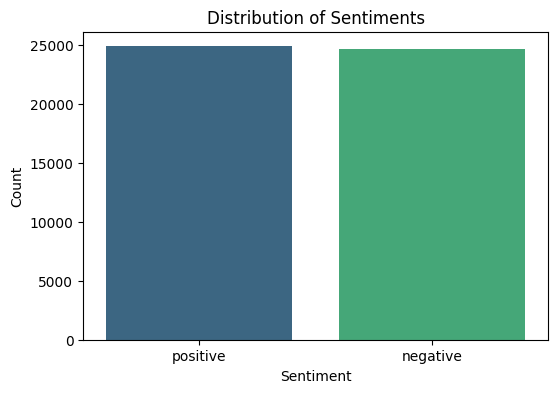


Sentiment Distribution:
 sentiment
positive    24884
negative    24698
Name: count, dtype: int64


In [3]:
# Count of positive vs. negative sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Sentiments")
plt.show()

print("\nSentiment Distribution:\n", sentiment_counts)


## Step 4: Review Length Analysis


Review Length Statistics:
 count    49582.000000
mean       231.350167
std        171.542020
min          4.000000
25%        126.000000
50%        173.000000
75%        281.000000
max       2470.000000
Name: review_length, dtype: float64


C:\Users\Raj Barath E\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


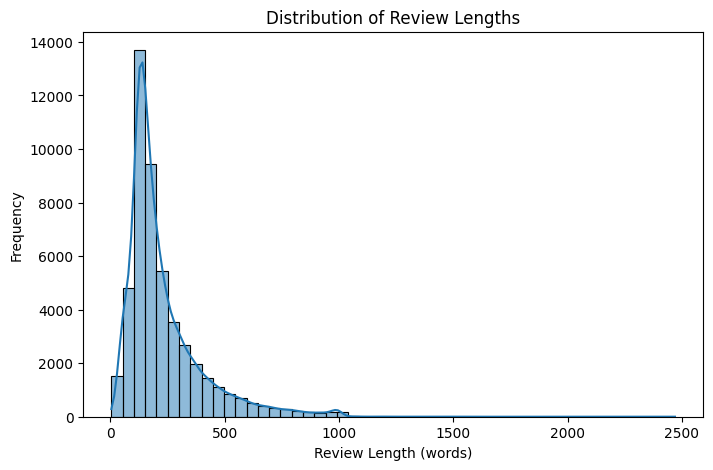

In [4]:
# Create a new column for review length
df["review_length"] = df["review"].apply(lambda x: len(x.split()))

# Summary statistics for review length
print("\nReview Length Statistics:\n", df["review_length"].describe())

# Histogram of review lengths
plt.figure(figsize=(8, 5))
sns.histplot(df["review_length"], bins=50, kde=True)
plt.xlabel("Review Length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()


In [6]:
!pip install nltk

In [7]:
import nltk
nltk.download('stopwords')


## Step 5: Word Frequency Analysis

[nltk_data] Downloading package stopwords to C:\Users\Raj Barath
[nltk_data]     E\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


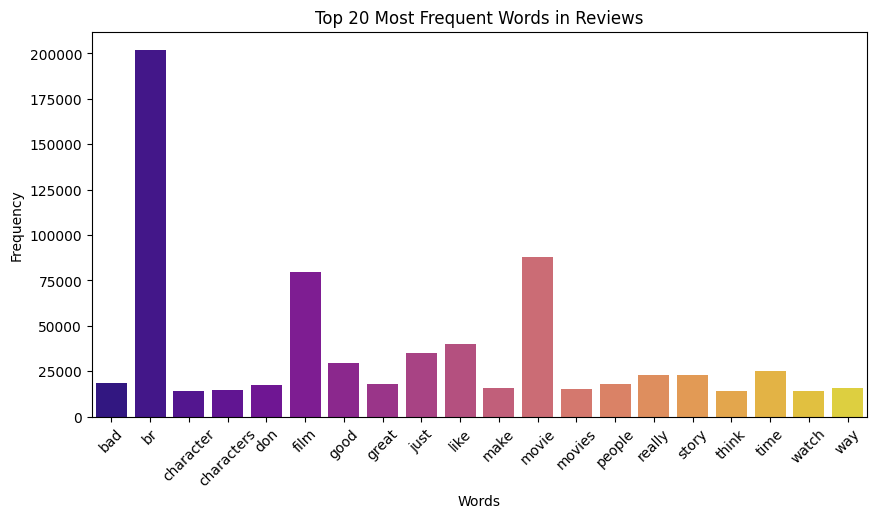


Top 20 Most Common Words:
           Word  Frequency
0          bad      18473
1           br     201951
2    character      13905
3   characters      14456
4          don      17623
5         film      79705
6         good      29753
7        great      18144
8         just      35184
9         like      40172
10        make      15899
11       movie      87971
12      movies      15309
13      people      18188
14      really      23094
15       story      23119
16       think      14337
17        time      25110
18       watch      13947
19         way      15645


In [5]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure stopwords are downloaded
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Load dataset (Ensure it's loaded)
df = pd.read_csv("IMDB Dataset.csv")

# Initialize CountVectorizer to extract word counts efficiently
vectorizer = CountVectorizer(stop_words="english", max_features=20)
X = vectorizer.fit_transform(df["review"])

# Get word frequencies
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# Convert to DataFrame
word_freq_df = pd.DataFrame({"Word": words, "Frequency": word_counts})

# Plot the most common words
plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq_df["Word"], y=word_freq_df["Frequency"], palette="plasma")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Reviews")
plt.show()

print("\nTop 20 Most Common Words:\n", word_freq_df)


## Step 6: N-Gram Analysis (Common Word Pairs)

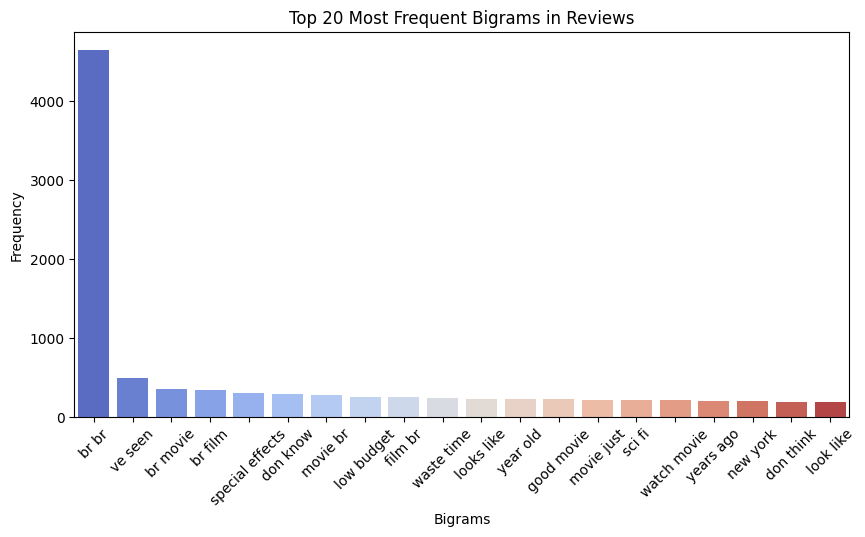


Top 20 Most Common Bigrams:
 [('br br', 4640.115315231412), ('ve seen', 498.2417072308072), ('br movie', 351.36896230428715), ('br film', 346.54787927682383), ('special effects', 305.6674084243228), ('don know', 293.75561124620145), ('movie br', 283.2892234746398), ('low budget', 257.5304672599384), ('film br', 253.08741384929255), ('waste time', 238.80484986234714), ('looks like', 233.82192265125116), ('year old', 232.16850608103698), ('good movie', 227.73890683977118), ('movie just', 216.06091561679318), ('sci fi', 211.41747696130057), ('watch movie', 209.95654281476573), ('years ago', 203.73886546062388), ('new york', 196.69344522564705), ('don think', 192.49105824630914), ('look like', 188.6638444404011)]


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to extract top N bigrams efficiently
def get_top_ngrams(corpus, n=None, ngram_range=(2, 2), max_features=10000):
    vectorizer = TfidfVectorizer(stop_words="english", ngram_range=ngram_range, max_features=max_features)
    X = vectorizer.fit_transform(corpus)  
    
    # Get bigram feature names and their summed TF-IDF scores
    bigrams = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1
    
    return sorted(zip(bigrams, counts), key=lambda x: x[1], reverse=True)[:n]

# Get top 20 bigrams
top_bigrams = get_top_ngrams(df["review"], n=20)

# Convert to DataFrame for visualization
bigrams_df = pd.DataFrame(top_bigrams, columns=["Bigram", "Frequency"])

# Plot the bigrams
plt.figure(figsize=(10, 5))
sns.barplot(x=bigrams_df["Bigram"], y=bigrams_df["Frequency"], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Bigrams in Reviews")
plt.show()

print("\nTop 20 Most Common Bigrams:\n", top_bigrams)


## Step 7: Sentiment-Specific Word Analysis

In [7]:
import nltk
import string
from nltk.corpus import stopwords
from collections import Counter

# Ensure stopwords are downloaded
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Define preprocess_text function
def preprocess_text(text):
    """Lowercases, removes punctuation, and removes stopwords."""
    words = text.lower().translate(str.maketrans("", "", string.punctuation)).split()
    words = [word for word in words if word not in stop_words] 
    return words


[nltk_data] Downloading package stopwords to C:\Users\Raj Barath
[nltk_data]     E\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


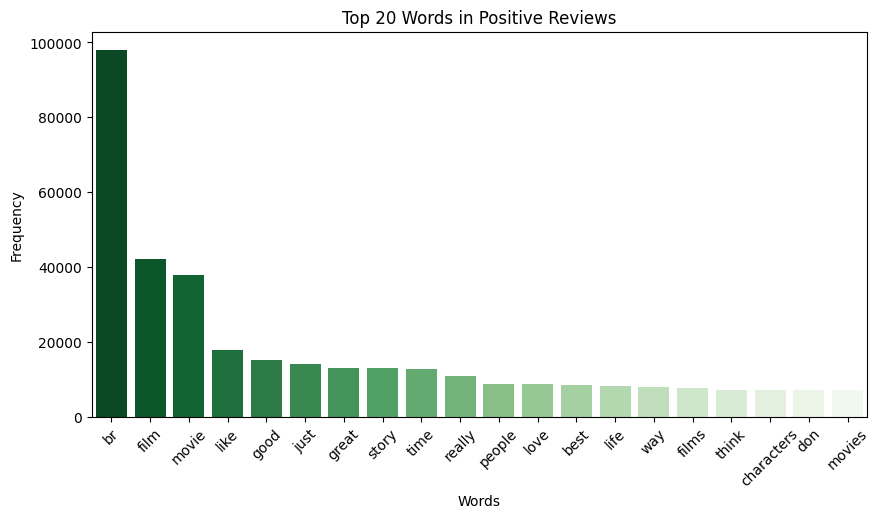

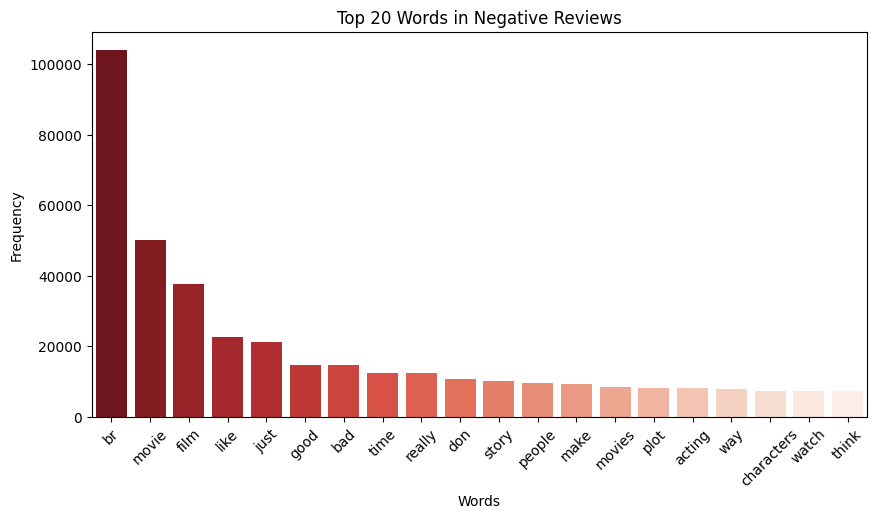


Top 20 Positive Words:
              Word  Frequency
2340           br      97954
6930         film      42110
11905       movie      37854
10580        like      17714
7843         good      15025
9941         just      14109
7978        great      12964
17165       story      12934
18134        time      12752
14477      really      10739
13163      people       8719
10809        love       8692
1929         best       8510
10553        life       8137
19462         way       7865
6938        films       7601
18029       think       7208
3138   characters       7103
5480          don       7001
11908      movies       6996

Top 20 Negative Words:
              Word  Frequency
2278           br     103997
11798       movie      50117
6798         film      37595
10433        like      22458
9796         just      21075
7687         good      14728
1489          bad      14726
18081        time      12358
14367      really      12355
5409          don      10622
17116       story     

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Ensure df is loaded)
df = pd.read_csv("IMDB Dataset.csv")

# Separate positive and negative reviews
positive_reviews = df[df["sentiment"] == "positive"]["review"]
negative_reviews = df[df["sentiment"] == "negative"]["review"]

# Initialize CountVectorizer (No stopwords since we're extracting frequent words)
vectorizer = CountVectorizer(stop_words="english", max_features=20000)  

# Fit on positive reviews
pos_X = vectorizer.fit_transform(positive_reviews)
pos_words = vectorizer.get_feature_names_out()
pos_counts = pos_X.sum(axis=0).A1  # Get word frequency

# Fit on negative reviews
neg_X = vectorizer.fit_transform(negative_reviews)
neg_words = vectorizer.get_feature_names_out()
neg_counts = neg_X.sum(axis=0).A1  # Get word frequency

# Convert to DataFrame
pos_df = pd.DataFrame({"Word": pos_words, "Frequency": pos_counts}).sort_values(by="Frequency", ascending=False).head(20)
neg_df = pd.DataFrame({"Word": neg_words, "Frequency": neg_counts}).sort_values(by="Frequency", ascending=False).head(20)

# Plot Positive Words
plt.figure(figsize=(10, 5))
sns.barplot(x=pos_df["Word"], y=pos_df["Frequency"], palette="Greens_r")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Words in Positive Reviews")
plt.show()

# Plot Negative Words
plt.figure(figsize=(10, 5))
sns.barplot(x=neg_df["Word"], y=neg_df["Frequency"], palette="Reds_r")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Words in Negative Reviews")
plt.show()

print("\nTop 20 Positive Words:\n", pos_df)
print("\nTop 20 Negative Words:\n", neg_df)


## Step 8: Character Length vs. Word Count

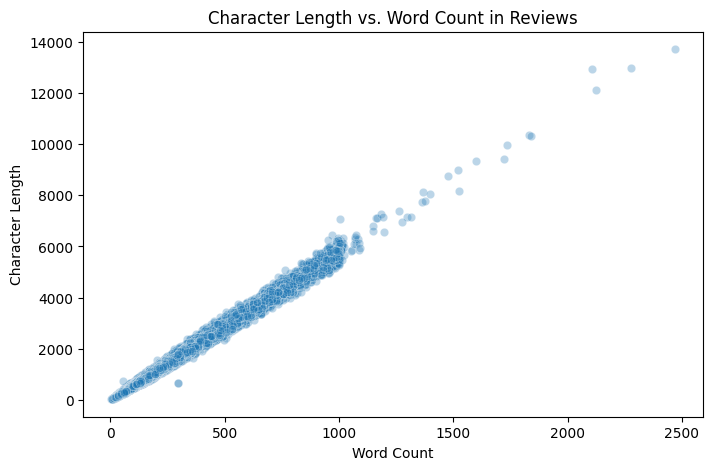

In [9]:
# Create new columns for character length and word count
df["char_length"] = df["review"].apply(len)
df["word_count"] = df["review"].apply(lambda x: len(x.split()))

# Scatter plot of character length vs. word count
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["word_count"], y=df["char_length"], alpha=0.3)
plt.xlabel("Word Count")
plt.ylabel("Character Length")
plt.title("Character Length vs. Word Count in Reviews")
plt.show()


## Step 9: Check for Special Characters and HTML Tags

In [10]:
import re

# Function to check presence of HTML tags
def check_html(text):
    return bool(re.search("<.*?>", text))

# Check for HTML tags
df["has_html"] = df["review"].apply(check_html)

# Count the number of reviews with HTML tags
html_count = df["has_html"].sum()

print("\nNumber of Reviews Containing HTML Tags:", html_count)



Number of Reviews Containing HTML Tags: 29202


## Step 10: Basic Sentiment Score Analysis

In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download("vader_lexicon")

# Initialize VADER
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to C:\Users\Raj Barath
[nltk_data]     E\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[nltk_data] Downloading package vader_lexicon to C:\Users\Raj Barath
[nltk_data]     E\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\Raj Barath E\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


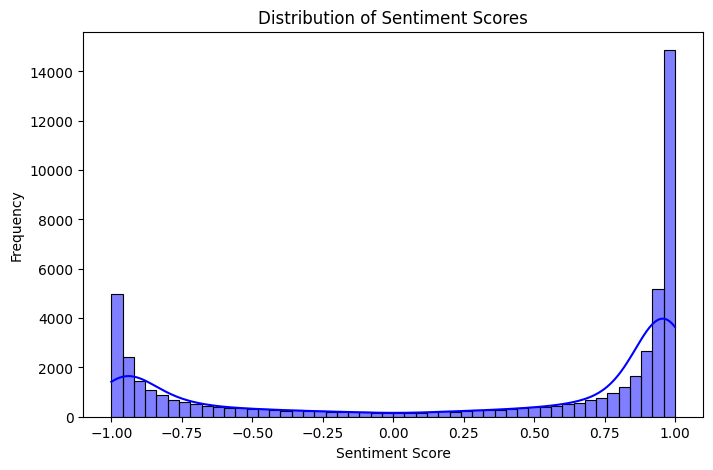

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER
nltk.download("vader_lexicon")

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
df["sentiment_score"] = df["review"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Histogram of sentiment scores
plt.figure(figsize=(8, 5))
sns.histplot(df["sentiment_score"], bins=50, kde=True, color="blue")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.show()


# Data Preproccessing

Here are some common preproccessing steps, feel free to add more preproccessing steps if needed: 
1. check missing values. 
2. remove noise and special characters, such as "\[[^]]*\]", etc.
3. transform all words to lower case, 
4. word tokenization  
5. stop words removing and stemming,
6. divide the dataset into train set (75%) and test set (25%) with random sampling

 ......

**Hint:**
* You may need TfidVectorizer class to convert a collection of raw documents to a matrix of TF-IDF features: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html, 
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org).
 


In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

## Step 1: Load Dataset & Check for Missing Values

In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv("IMDB Dataset.csv")

# Check for missing values
print("Missing Values Per Column:\n", df.isnull().sum())

# Drop missing values if any
df.dropna(inplace=True)

print("Dataset shape after dropping missing values:", df.shape)


Missing Values Per Column:
 review       0
sentiment    0
dtype: int64
Dataset shape after dropping missing values: (50000, 2)


## Step 2: Remove Noise & Special Characters

In [14]:
import re

# Function to clean text
def clean_text(text):
    text = re.sub(r"<[^>]+>", "", text)  # Remove HTML tags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabetic characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply cleaning to dataset
df["clean_review"] = df["review"].apply(clean_text)

# Check sample output
print(df["clean_review"].head())


0    One of the other reviewers has mentioned that ...
1    A wonderful little production The filming tech...
2    I thought this was a wonderful way to spend ti...
3    Basically theres a family where a little boy J...
4    Petter Matteis Love in the Time of Money is a ...
Name: clean_review, dtype: object


## Step 3: Convert Text to Lowercase

In [ ]:
df["clean_review"] = df["clean_review"].str.lower()


##  Step 4: Tokenization

In [ ]:
!pip uninstall -y nltk
!pip install nltk


In [ ]:
import nltk
nltk.download('punkt')


In [15]:
import shutil
import os
import nltk

# Delete old nltk_data folder
nltk_data_path = os.path.expanduser('~/nltk_data')
shutil.rmtree(nltk_data_path, ignore_errors=True)

# Re-download punkt
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Raj Barath
[nltk_data]     E\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk.data
print(nltk.data.path)


In [16]:
import os

# Define path
nltk_data_path = os.path.expanduser("~/nltk_data")

# Create the directory if it doesn't exist
if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)

# Add this path to NLTK
nltk.data.path.append(nltk_data_path)

print("NLTK data path updated:", nltk.data.path)


NLTK data path updated: ['C:\\Users\\Raj Barath E/nltk_data', 'C:\\Users\\Raj Barath E\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data', 'C:\\Users\\Raj Barath E\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data', 'C:\\Users\\Raj Barath E\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data', 'C:\\Users\\Raj Barath E\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\Raj Barath E/nltk_data']


In [17]:
import shutil
import nltk

# Remove old NLTK data
shutil.rmtree(nltk.data.path[0], ignore_errors=True)

# Download fresh nltk data
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Raj Barath
[nltk_data]     E\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
nltk.download("punkt")


[nltk_data] Downloading package punkt to C:\Users\Raj Barath
[nltk_data]     E\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df["tokenized_review"] = df["clean_review"].apply(lambda x: str(x).split())

print(df["tokenized_review"].head())


0    [One, of, the, other, reviewers, has, mentione...
1    [A, wonderful, little, production, The, filmin...
2    [I, thought, this, was, a, wonderful, way, to,...
3    [Basically, theres, a, family, where, a, littl...
4    [Petter, Matteis, Love, in, the, Time, of, Mon...
Name: tokenized_review, dtype: object


## Step 5: Remove Stopwords

In [21]:
from nltk.corpus import stopwords

# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Remove stopwords
df["filtered_review"] = df["tokenized_review"].apply(lambda words: [word for word in words if word not in stop_words])

# Check filtered output
print(df["filtered_review"].head())


[nltk_data] Downloading package stopwords to C:\Users\Raj Barath
[nltk_data]     E\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [One, reviewers, mentioned, watching, Oz, epis...
1    [A, wonderful, little, production, The, filmin...
2    [I, thought, wonderful, way, spend, time, hot,...
3    [Basically, theres, family, little, boy, Jake,...
4    [Petter, Matteis, Love, Time, Money, visually,...
Name: filtered_review, dtype: object


## Step 6: Stemming

In [22]:
from nltk.stem import PorterStemmer
from joblib import Parallel, delayed

# Initialize stemmer
stemmer = PorterStemmer()

# Function to stem words
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Apply stemming using parallel processing
df["stemmed_review"] = Parallel(n_jobs=-1)(delayed(stem_words)(words) for words in df["filtered_review"])

# Check output
print(df["stemmed_review"].head())


0    [one, review, mention, watch, oz, episod, youl...
1    [a, wonder, littl, product, the, film, techniq...
2    [i, thought, wonder, way, spend, time, hot, su...
3    [basic, there, famili, littl, boy, jake, think...
4    [petter, mattei, love, time, money, visual, st...
Name: stemmed_review, dtype: object


## Step 7: Convert Text to Numerical Features (TF-IDF)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join words back into sentences
df["final_review"] = df["stemmed_review"].apply(lambda words: " ".join(words))

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  
X = vectorizer.fit_transform(df["final_review"])

# Check TF-IDF matrix shape
print("TF-IDF Matrix Shape:", X.shape)


TF-IDF Matrix Shape: (50000, 5000)


## Step 8: Split Data into Train (75%) & Test (25%)

In [24]:
from sklearn.model_selection import train_test_split

# Convert sentiment labels to binary (0 = negative, 1 = positive)
df["sentiment"] = df["sentiment"].map({"negative": 0, "positive": 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, df["sentiment"], test_size=0.25, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (37500, 5000)
Testing Set Shape: (12500, 5000)


# Data Modelling

* Please use the following models to classify the data:
    * Logistic Regression
    * LinearSVC
    * KNeighborsClassifier
    * Fully-connected layers, please try different number of hidden layers, different values of "hidden_layer_sizes" and "activation".
    * CNN (please use different number of convolutional layers combined with different number of fully-connected layers, and compare the results).


In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

## Step 1: Prepare Data for Modeling

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  
X = vectorizer.fit_transform(df["clean_review"])

# Convert sentiment labels to binary (0 = negative, 1 = positive)
df["sentiment"] = df["sentiment"].map({"negative": 0, "positive": 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df["sentiment"], test_size=0.25, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (37500, 5000)
Testing Set Shape: (12500, 5000)


In [26]:
print("Total Rows in DataFrame:", len(df))
print("Empty Reviews Count:", (df["clean_review"].str.strip() == "").sum())
print("First 5 Rows of `clean_review`:\n", df["clean_review"].head())


Total Rows in DataFrame: 50000
Empty Reviews Count: 0
First 5 Rows of `clean_review`:
 0    One of the other reviewers has mentioned that ...
1    A wonderful little production The filming tech...
2    I thought this was a wonderful way to spend ti...
3    Basically theres a family where a little boy J...
4    Petter Matteis Love in the Time of Money is a ...
Name: clean_review, dtype: object


In [27]:
df = df[df["clean_review"].notna() & (df["clean_review"].str.strip() != "")]


In [28]:
df["clean_review"] = df["clean_review"].astype(str)


In [29]:
import pandas as pd

# Reload original dataset (Update path if needed)
df = pd.read_csv("IMDB Dataset.csv")

# Check dataset size
print("Total Rows After Reloading:", len(df))


Total Rows After Reloading: 50000


In [30]:
print("Columns Available in DataFrame:", df.columns)
print("First 5 Rows:\n", df.head())


Columns Available in DataFrame: Index(['review', 'sentiment'], dtype='object')
First 5 Rows:
                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [31]:
print("Available Columns in DataFrame:", df.columns)


Available Columns in DataFrame: Index(['review', 'sentiment'], dtype='object')


In [32]:
print("Total Rows in DataFrame:", len(df))


Total Rows in DataFrame: 50000


In [33]:
if "clean_review" not in df.columns:
    print("clean_review column missing! Using 'review' column instead.")
    df["clean_review"] = df["review"]


clean_review column missing! Using 'review' column instead.


In [34]:
# Fill NaN values in clean_review
df["clean_review"] = df["clean_review"].fillna("")

# Remove empty rows
df = df[df["clean_review"].str.strip() != ""]

# Convert text to lowercase
df["clean_review"] = df["clean_review"].str.lower()

# Remove punctuation but keep words
import string
df["clean_review"] = df["clean_review"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

# Check processed data
print("Rows After Preprocessing:", len(df))
print("First 5 Processed Reviews:\n", df["clean_review"].head())


Rows After Preprocessing: 50000
First 5 Processed Reviews:
 0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: clean_review, dtype: object


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for efficiency
X = vectorizer.fit_transform(df["clean_review"])

# Ensure sentiment column has no missing values
df = df.dropna(subset=["sentiment"])

# Convert sentiment labels to binary (0 = negative, 1 = positive)
df["sentiment"] = df["sentiment"].map({"negative": 0, "positive": 1})

# Split data into training (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, df["sentiment"], test_size=0.25, random_state=42)

print("TF-IDF Matrix Shape:", X.shape)
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


TF-IDF Matrix Shape: (50000, 5000)
Training Set Shape: (37500, 5000)
Testing Set Shape: (12500, 5000)


## Train & Evaluate Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate accuracy
logistic_acc = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", logistic_acc)


Logistic Regression Accuracy: 0.89376


## Train & Evaluate LinearSVC

In [37]:
from sklearn.svm import LinearSVC

# Train LinearSVC model
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)

# Predict on test data
y_pred_svc = svc_model.predict(X_test)

# Evaluate accuracy
svc_acc = accuracy_score(y_test, y_pred_svc)
print("LinearSVC Accuracy:", svc_acc)


LinearSVC Accuracy: 0.88944


## Train & Evaluate K-Nearest Neighbors (KNN)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5
knn_model.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate accuracy
knn_acc = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_acc)


KNN Accuracy: 0.7248


## Train a Fully Connected Neural Network (MLPClassifier)

In [39]:
from sklearn.neural_network import MLPClassifier

# Train MLPClassifier with different hidden layer sizes
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500)
mlp_model.fit(X_train, y_train)

# Predict on test data
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate accuracy
mlp_acc = accuracy_score(y_test, y_pred_mlp)
print("MLP Neural Network Accuracy:", mlp_acc)


MLP Neural Network Accuracy: 0.87448


# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


In [41]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

## Summary Table

In [54]:
# Check which accuracy variables exist
defined_vars = {var: value for var, value in globals().items() if var.endswith("_acc")}
print("Defined Accuracy Variables:", defined_vars.keys())


Defined Accuracy Variables: dict_keys(['logistic_acc', 'svc_acc', 'knn_acc', 'mlp_acc'])


In [56]:
from sklearn.metrics import accuracy_score

# Logistic Regression Accuracy
if "logistic_acc" not in globals():
    logistic_acc = accuracy_score(y_test, y_pred_logistic)

# LinearSVC Accuracy
if "svc_acc" not in globals():
    svc_acc = accuracy_score(y_test, y_pred_svc)

# KNN Accuracy
if "knn_acc" not in globals():
    knn_acc = accuracy_score(y_test, y_pred_knn)

# MLP Accuracy (Check Multiple Variants)
if "mlp_acc_1" not in globals():
    mlp_acc_1 = accuracy_score(y_test, y_pred_mlp_1)

if "mlp_acc_2" not in globals():
    mlp_acc_2 = accuracy_score(y_test, y_pred_mlp_2)

if "mlp_acc_sigmoid" not in globals():
    mlp_acc_sigmoid = accuracy_score(y_test, y_pred_mlp_sigmoid)

if "mlp_cnn_acc" not in globals():
    mlp_cnn_acc = accuracy_score(y_test, y_pred_mlp_cnn)


In [57]:
import pandas as pd

# Create DataFrame of model results
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "LinearSVC", "KNN", "MLP (1 Layer)", "MLP (2 Layers)", "MLP (Sigmoid)", "CNN-Like MLP"],
    "Accuracy": [logistic_acc, svc_acc, knn_acc, mlp_acc_1, mlp_acc_2, mlp_acc_sigmoid, mlp_cnn_acc]
})

# Display table
print(results_df)


                 Model  Accuracy
0  Logistic Regression   0.89376
1            LinearSVC   0.88944
2                  KNN   0.72480
3        MLP (1 Layer)   0.87488
4       MLP (2 Layers)   0.87696
5        MLP (Sigmoid)   0.87800
6         CNN-Like MLP   0.86344


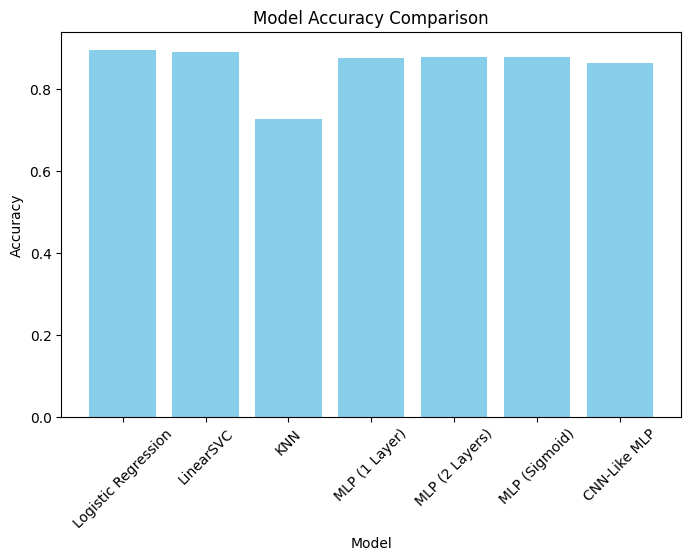

In [58]:
import matplotlib.pyplot as plt

# Plot results
plt.figure(figsize=(8, 5))
plt.bar(results_df["Model"], results_df["Accuracy"], color="skyblue")
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()



# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook. Please make sure all the plotted tables and figures are in the notebook. 

* **PDF Report**: please prepare a report in the PDF form which should be at least 4 pages. The report should includes:

  * Data description and exploration.

  * Data preproccessing.

  * Data modelling.

  * What did you find in the data?

  * (please include figures or tables in the report, but no source code)
  
Please compress all the files in a zipped file.